In [2]:
library(ape)
library(phytools)
library(phangorn)
library(phylosignal)
library(phylobase)
library(RPANDA)
library(phylolm)

source("NeTaGFT.R")

In [6]:
#error rate
beta <- 0.0

#create simulation traits
Nsub <- 25
N <- Nsub * 4
X <- matrix(0,N,9)
colnames(X) <- c("A","B","C","D","E","F","G","Ctrl(25)","Ctrl(50)")
X[1:(2*Nsub),1] <- 1
X[1:Nsub,2] <- 1
X[1:Nsub+Nsub,3] <- 1
X[1:(2*Nsub)+2*Nsub,4] <- 1
X[1:Nsub+2*Nsub,5] <- 1
X[1:Nsub+3*Nsub,6] <- 1
X[,7] <- X[,2] + X[,5]
X[,8] <- sample(X[,2])
X[,9] <- sample(X[,1])

#switching with probability beta
for(i in 1:dim(X)[2]){
  for(j in 1:dim(X)[1]){
    if(runif(1) < beta){
      X[j,i] <- 1 - X[j,i]
    }
  }
}

#normalization
for(i in 1:dim(X)[2]){
  X[,i] <- X[,i]/sqrt(sum(X[,i]**2))
}

        A         B         C         D         E         F         G  Ctrl(25) 
0.2487388 0.3528767 0.1531806 0.2487388 0.3266743 0.1587265 0.1741433 0.9179680 
 Ctrl(50) 
0.9416926 


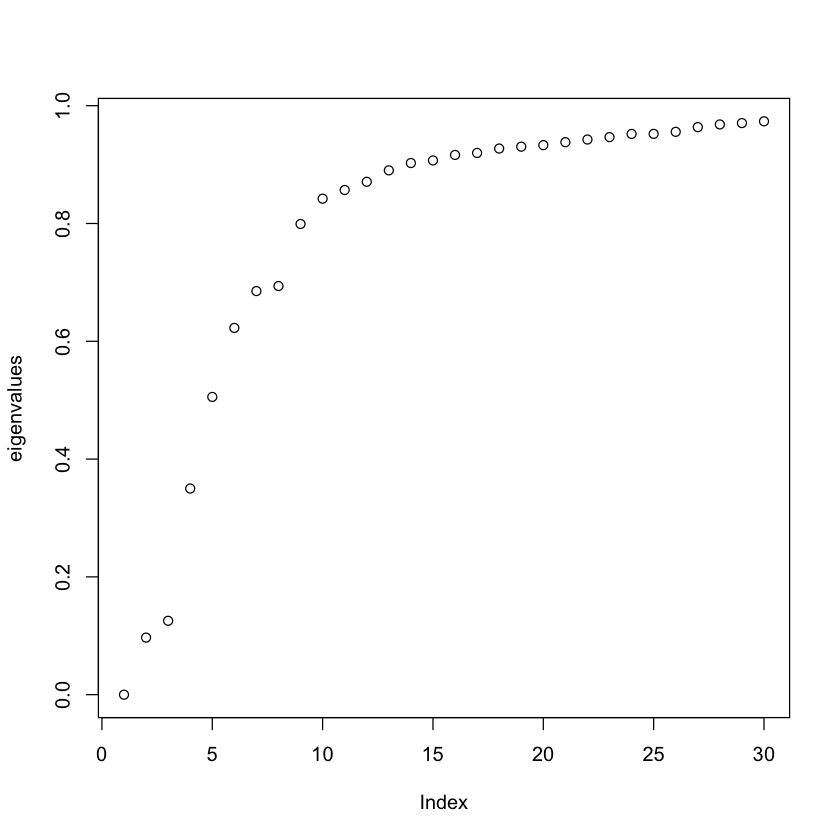

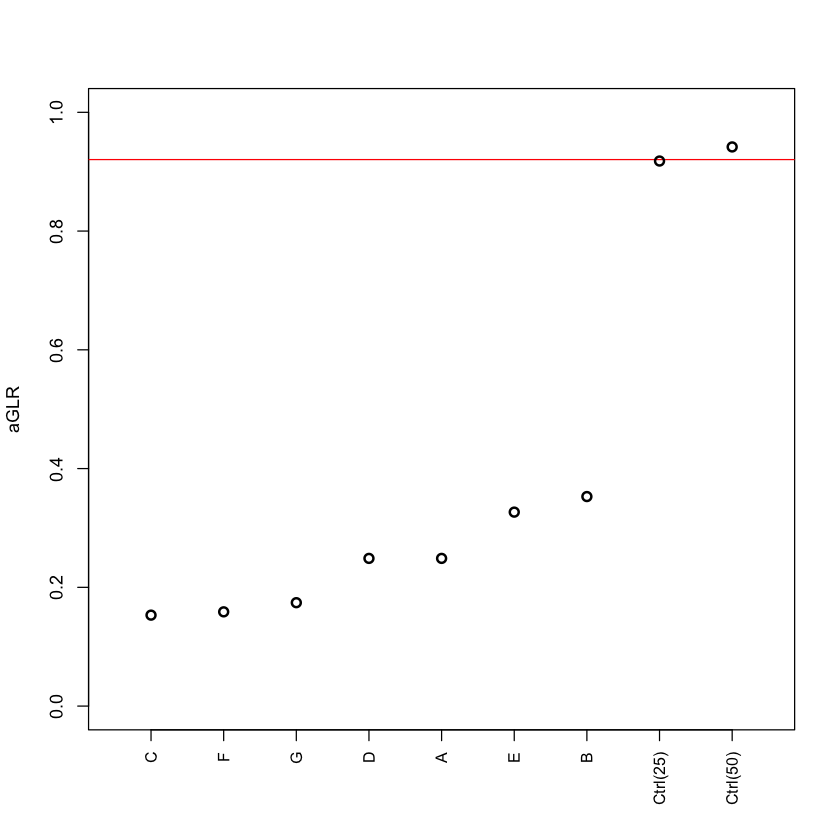

In [7]:
#aGLR
fin <- "dataset_simulation/KNN_hgt.txt"
A <- as.matrix(read.table(fin))
diag(A) <- 1
L <- sym_normalized_graph_laplacian(A)
tmp <- graph_fourier_transform(L,X,30)
U <- tmp$U
eigenvalues <- tmp$eigenvalues
hF <- tmp$hF
tF <- tmp$tF

aGLRs <- rep(0,ncol(X))
names(aGLRs) <- colnames(X)
for(i in 1:ncol(X)){
  aGLRs[i] <- graph_laplacian_regularizer(X[,i], U, eigenvalues)
}
print(aGLRs)

plot(eigenvalues)
plot_aGLR(X, U, 100)

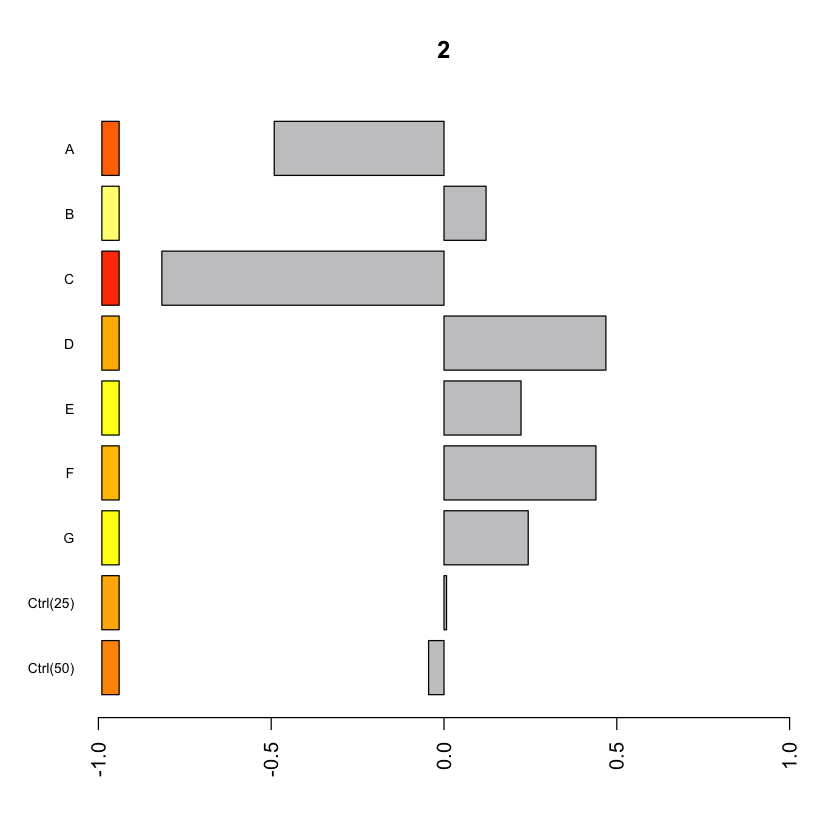

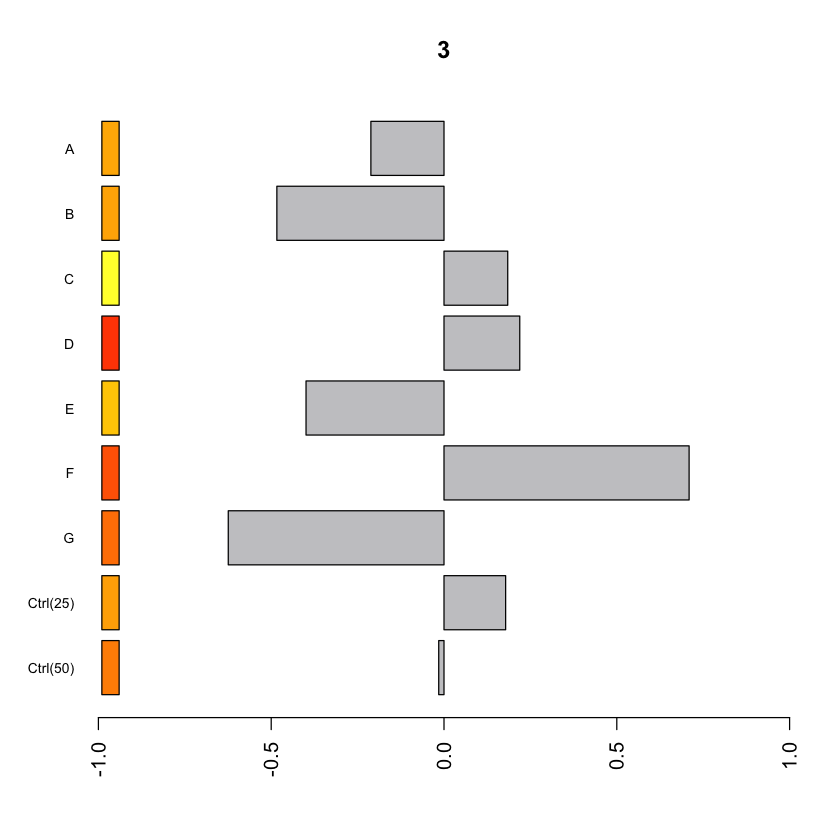

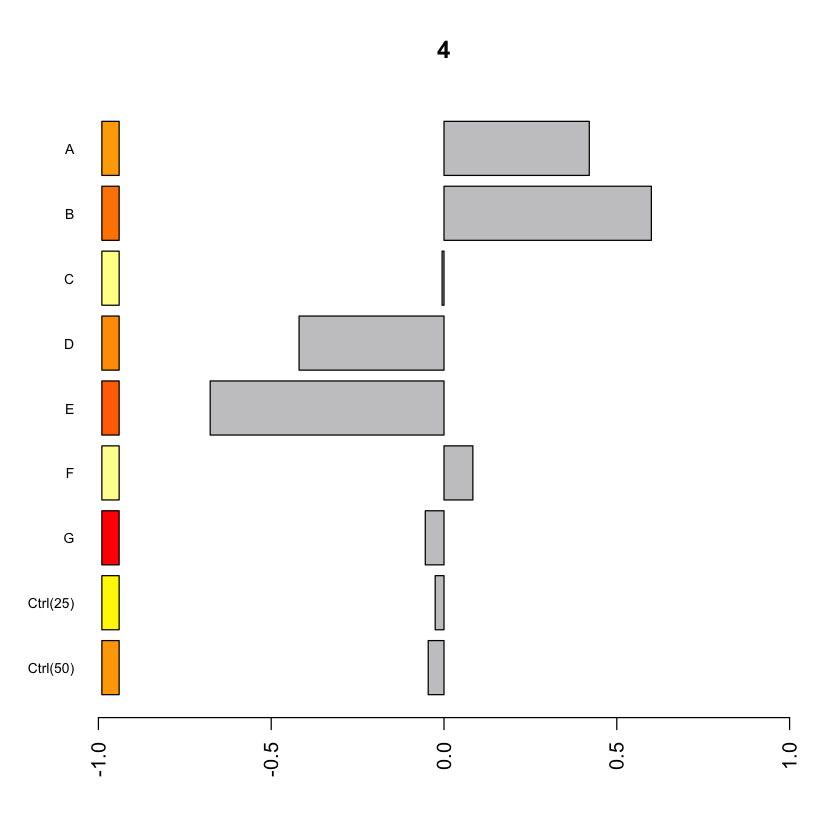

In [8]:
barplot_gfdomain(hF,tF,2)
barplot_gfdomain(hF,tF,3)
barplot_gfdomain(hF,tF,4)